---
# Web scraping with Python

---

### What is Web Scraping?

**Web Scraping** (also termed Screen Scraping, Web Data Extraction, etc.) is a technique employed to extract large amounts of data from websites whereby the data is extracted and saved to a local file in your computer or to a database in table (spreadsheet) format.

Data displayed by most websites can only be viewed using a web browser. Examples are data litsings at yellow pages directories, real estate sites, social networks, industrial inventory, online shopping sites, contact databases etc. Most websites do not offer the functionality to save a copy of the data which they display to your computer. The only option then is to manually copy and paste the data displayed by the website in your browser to a local file in your computer - a very tedious job which can take many hours or sometimes days to complete.

Web Scraping is the technique of automating this process, so that instead of manually copying the data from websites, the Web Scraping software will perform the same task within a fraction of the time.

A Web Scraping software will interact with websites in the same way as your web browser. But instead of displaying the data served by the website on screen, the Web Scraping software saves the required data from the web page to a local file or database.

<img src="images/scraping.png" width=120%>

### Python tools for Web Scraping

[**_BeautifulSoup_**](http://www.crummy.com/software/BeautifulSoup/bs4/doc/) is an incredible Python tool (open library) for pulling out information from a webpage. You can use it to extract tables, lists, paragraph and you can also put filters to extract information from web pages.

You can install it usin pip, for eaxmple:

    $ sudo pip3 install -U beautifulsoup4
    
BeautifulSoup does not fetch the web page for us. That’s why, we will use [**_requests_**](http://docs.python-requests.org/en/master/) library in combination with the BeautifulSoup library.

Python has several other options for HTML scraping in addition to BeatifulSoup. Here are some others:

* [`mechanize`](http://wwwsearch.sourceforge.net/mechanize/);
* [`scrapemark`](http://arshaw.com/scrapemark/);
* [`scrapy`](http://scrapy.org/).

Let's import need libraries:

In [1]:
from bs4 import BeautifulSoup
import requests

### A few words about HTML tags

While performing web scarping, we deal with html tags. Thus, we must have good understanding of them. If you already know basics of HTML, you can skip this section. Below is the basic syntax of HTML:

<img src="images/html1.png">

This syntax has various tags as elaborated below:

1. **`<!DOCTYPE html>`**: HTML documents must start with a type declaration;
2. HTML document is contained between **`<html>`** and **`</html>`**;
3. The visible part of the HTML document is between **`<body>`** and **`</body>`**;
4. HTML headings are defined with the **`<h1>`** to **`<h6>`** tags;
5. HTML paragraphs are defined with the **`<p>`** tag.

Other useful HTML tags are:

* HTML links are defined with the **`<a>`** tag, **`<a href="http://www.test.com">This is a link for test.com</a>`**;
* HTML tables are defined with **`<table>`**, row as **`<tr>`** and rows are divided into data as **`<td>`**;

<img src="images/html2.png">

* HTML list starts with **`<ul>`** (unordered) and **`<ol>`** (ordered). Each item of list starts with **`<li>`**;

<img src="images/html3.jpg" style="padding: 0 250px 0 0;" width=40%>

* There are two type of specific HTML tags **`<div>`** and **`<span>`** that play role of wrappers for some other tags;

* **`class`** and **`id`** attributes are identifiers of some HTML tags.

<img src="images/html4.jpg" width=36%>
<img src="images/html5.jpg" width=52%>

If you are new to this HTML tags, I would also recommend you to refer [HTML tutorial from W3schools](http://www.w3schools.com/html/), for example. This will give you a clear understanding about HTML tags.

### Scraping of IMDB site

The general idea behind web scraping is to retrieve data that exists on a website, and convert it into a format that is usable for analysis. Webpages are rendered by the brower from HTML and CSS code, but much of the information included in the HTML underlying any website is not interesting to us.

We will extract data about most popular movies from [IMDB](http://www.imdb.com/). The same approach can be applied to scraping data from any other web site.

First of all, we scrape data about 50 most popular movies, which were released from 1900 to 2015, using this link: <br></br> http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1900,2015.

We begin by reading in the source code for a given web page and creating a BeautifulSoup object with the `BeautifulSoup` function.

In [2]:
url = "http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1900,2015"
# Get data from URL
page = requests.get(url)

# Display HTML page
print page.text

    

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
        "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
        <head>
                <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<script>
var addClickstreamHeadersToAjax = function(xhr) {
    xhr.setRequestHeader("x-imdb-parent-id", "0MTNGKAG0S2CNHQ0QS8A");
};
</script>

                <title>IMDb: Most Voted   Feature Films Released 1900-2015
</title>
<link rel="canonical" href="http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1900,2015" /><meta property="og:url" content="http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1900,2015" />

<link rel="stylesheet" type="text/css" href="http://i.media-imdb.com/images/SFf916c48ae9059d778bc2a0138c326bdf/css2/consumersite.css" ><link rel="stylesheet" type="text/css" href="http://i.media-imdb.com/images/SFd36761b30ebc061c8d30826d3d211d3c

In [3]:
# Parse the HTML in the `page` variable, and store it in Beautiful Soup format
bs = BeautifulSoup(page.text, 'html.parser')
# `'html.parser'` is an not required argument which allows to process large HTML code
bs


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
        "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script>
var addClickstreamHeadersToAjax = function(xhr) {
    xhr.setRequestHeader("x-imdb-parent-id", "0MTNGKAG0S2CNHQ0QS8A");
};
</script>
<title>IMDb: Most Voted   Feature Films Released 1900-2015
</title>
<link href="http://www.imdb.com/search/title?sort=num_votes,desc&amp;start=1&amp;title_type=feature&amp;year=1900,2015" rel="canonical"/><meta content="http://www.imdb.com/search/title?sort=num_votes,desc&amp;start=1&amp;title_type=feature&amp;year=1900,2015" property="og:url"/>
<link href="http://i.media-imdb.com/images/SFf916c48ae9059d778bc2a0138c326bdf/css2/consumersite.css" rel="stylesheet" type="text/css"><link href="http://i.media-imdb.com/images/SFd36761b30ebc061c8d30826d3d211d3c/css2/site/consumer-navbar-mega.css" rel="stylesheet" type=

Each browser provides a tool for analysis and watching of web page content. Commonly, it is called Web Inspector. The easiest way to open Inspector window is a mouse right click on some webpage. After that you should select respective option in context menu. Particularly, for Google Chrome browser (note, all further screenshots are made in this browser) you should select "Inspect" option. 

So, let's go to the page http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1900,2015 and open Inspector. The Elements menu shows the HTML code of the web page. The Inspector window should looks like this (or it may be display horizontally down the page)

<img src="images/imdb1.jpg">

Each movie in the list left of the web page is an **`<tr>`** tag of the HTML code, where **`<td>`** tag with `class` attribute  equals to `"title"` corresponds text data about the movie

<img src="images/imdb2.jpg">

`findAll(tags)` method of BeautifulSoup collect all tags `tags` in the defined BeautifulSoup instance and return a Python list of all these object. Thus, let's extract data for "The Shawshank Redemption":

In [4]:
# The first argument of `findAll` method is tag name, the other one is class name
movies = bs.findAll('td','title')
print "Found {} movies on the web page\n".format(len(movies))

movie_1 = movies[0]
movie_1

It was found 50 movies on the web page



<td class="title">
<span class="wlb_wrapper" data-caller-name="search" data-size="small" data-tconst="tt0111161"></span>
<a href="/title/tt0111161/">The Shawshank Redemption</a>
<span class="year_type">(1994)</span><br>
<div class="user_rating">
<div class="rating rating-list" data-auth="BCYmHa2rcEw28pCA9WtDhT1XrnG1lUkO54Upqtry7sf9dQJLPkd85jZfdPiwb3NAJ1LqCrMvKzXrTTQCALnRM9l-6Pwtt6TgBqKSeeGZr7ToxFQ" data-ga-identifier="advsearch" id="tt0111161|imdb|9.3|9.3|advsearch" title="Users rated this 9.3/10 (1,619,517 votes) - click stars to rate">
<span class="rating-bg"> </span>
<span class="rating-imdb" style="width: 130px"> </span>
<span class="rating-stars">
<a href="/register/login?why=vote" rel="nofollow" title="Register or login to rate this title"><span>1</span></a>
<a href="/register/login?why=vote" rel="nofollow" title="Register or login to rate this title"><span>2</span></a>
<a href="/register/login?why=vote" rel="nofollow" title="Register or login to rate this title"><span>3</span></

The next screenshot shows the respective HTML tags (blocks), which we will extract data:

<img src="images/imdb3.jpg" width=70%>

Thus, for "The Shawshank Redemption":

In [5]:
# All HTML tags are highlighted above. 
# Note, method `find()` returns only the first occurrence tag
# attribute `contents` gives content of the tag (what is recorded inside a tag)
# Pay attention how we search the neccesary blocks
title = movie_1.find('a').contents[0]
genres = movie_1.find('span','genre').findAll('a')
genres = [g.contents[0] for g in genres]
runtime = movie_1.find('span','runtime').contents[0]
rating = movie_1.find('span','value').contents[0]
year = movie_1.find('span','year_type').contents[0]
print 'Title: {}\nGenres: {}\nRuntime: {}\nRating: {}\nYear: {}'.format(title, genres, runtime, rating, year)

Title: The Shawshank Redemption
Genres: [u'Crime', u'Drama']
Runtime: 142 mins.
Rating: 9.3
Year: (1994)


---
> ### Exercise:

> Supplement the above list of field data with the short description of the movie, which is highighted by `outline` in the picture below. Call this variable also `outline`.

> Further we will collect these six fields for each movie.

---

In [ ]:
# type your code here

We can extract data about each movie using `for` loop:

In [6]:
for movie in movies:
    title = movie.find('a').contents[0]
    genres = movie.find('span','genre').findAll('a')
    genres = [g.contents[0] for g in genres]
    runtime = movie.find('span','runtime').contents[0]
    rating = movie.find('span','value').contents[0]
    year = movie.find('span','year_type').contents[0]
    print title, genres, runtime, rating, year

The Shawshank Redemption [u'Crime', u'Drama'] 142 mins. 9.3 (1994)
The Dark Knight [u'Action', u'Crime', u'Drama'] 152 mins. 9.0 (2008)
Inception [u'Action', u'Mystery', u'Sci-Fi', u'Thriller'] 148 mins. 8.8 (2010)
Fight Club [u'Drama'] 139 mins. 8.9 (1999)
Pulp Fiction [u'Crime', u'Drama'] 154 mins. 8.9 (1994)
The Lord of the Rings: The Fellowship of the Ring [u'Adventure', u'Drama', u'Fantasy'] 178 mins. 8.8 (2001)
Forrest Gump [u'Drama', u'Romance'] 142 mins. 8.8 (1994)
The Matrix [u'Action', u'Sci-Fi'] 136 mins. 8.7 (1999)
The Lord of the Rings: The Return of the King [u'Adventure', u'Drama', u'Fantasy'] 201 mins. 8.9 (2003)
The Godfather [u'Crime', u'Drama'] 175 mins. 9.2 (1972)
The Dark Knight Rises [u'Action', u'Thriller'] 164 mins. 8.5 (2012)
The Lord of the Rings: The Two Towers [u'Adventure', u'Drama', u'Fantasy'] 179 mins. 8.7 (2002)
Se7en [u'Crime', u'Drama', u'Mystery', u'Thriller'] 127 mins. 8.6 (1995)
Gladiator [u'Action', u'Drama'] 155 mins. 8.5 (2000)
The Avengers [u'A

We want also obtain data about director(s) and actors who play the mail roles in the movie. These data is placed in the **`span`** with class name `credit` (see picture above). Moreover, each name represents the link for the page with information about the respective person. So, we will scrape directors/actors names and links to its pages, after that we will scrape dome data from these pages. 

Let's make all actions at first for "The Shawshank Redemption", then we will repeat them for all other movies.

In [7]:
persons = movie_1.find('span', 'credit').findAll('a')
print persons

[<a href="/name/nm0001104/">Frank Darabont</a>, <a href="/name/nm0000209/">Tim Robbins</a>, <a href="/name/nm0000151/">Morgan Freeman</a>, <a href="/name/nm0348409/">Bob Gunton</a>]


In [8]:
# Pay attention, `href` attribute of `<a>` tag contains the URL value.
# To obtain it we should call this attribute like a key of Python dictionary 
vals = []
for i in persons:
    vals.append({'name': i.contents[0], 'link': 'http://www.imdb.com' + i['href']})
    print vals[-1]

{'link': u'http://www.imdb.com/name/nm0001104/', 'name': u'Frank Darabont'}
{'link': u'http://www.imdb.com/name/nm0000209/', 'name': u'Tim Robbins'}
{'link': u'http://www.imdb.com/name/nm0000151/', 'name': u'Morgan Freeman'}
{'link': u'http://www.imdb.com/name/nm0348409/', 'name': u'Bob Gunton'}


Great, but in this way we lost data about who of these four person is the director of the movie. Thus, we will go in more sophisticated way:

In [9]:
# 1. Extract full tag including all its content
persons = movie_1.find('span','credit')
# We can use `prettify()` method to make outputs more readable
print persons.prettify()

<span class="credit">
 Dir:
 <a href="/name/nm0001104/">
  Frank Darabont
 </a>
 With:
 <a href="/name/nm0000209/">
  Tim Robbins
 </a>
 ,
 <a href="/name/nm0000151/">
  Morgan Freeman
 </a>
 ,
 <a href="/name/nm0348409/">
  Bob Gunton
 </a>
</span>



In [10]:
# 2. Convert above tag into a Python string and then divide it into director's and actors' parts  
dirs, actors = str(persons).split("With:")
print dirs.strip()
print 
print actors.strip()

<span class="credit">
    Dir: <a href="/name/nm0001104/">Frank Darabont</a>

<a href="/name/nm0000209/">Tim Robbins</a>, <a href="/name/nm0000151/">Morgan Freeman</a>, <a href="/name/nm0348409/">Bob Gunton</a>
</span>


In [11]:
# 3. Prepare separate BeautifulSoup instances for each above string
# Note, we must provide open or close pair of `<span>` tag for these strings
dirs = BeautifulSoup(dirs.strip() + '</span>')
actors = BeautifulSoup('<span>' + actors.strip())
print dirs.prettify()
print 
print actors.prettify()

<html>
 <body>
  <span class="credit">
   Dir:
   <a href="/name/nm0001104/">
    Frank Darabont
   </a>
  </span>
 </body>
</html>

<html>
 <body>
  <span>
   <a href="/name/nm0000209/">
    Tim Robbins
   </a>
   ,
   <a href="/name/nm0000151/">
    Morgan Freeman
   </a>
   ,
   <a href="/name/nm0348409/">
    Bob Gunton
   </a>
  </span>
 </body>
</html>


In [12]:
# 4. And now can extract data about director(s)
a = dirs.findAll('a')
directors = []
for i in a:
    # We add below the 'http://www.imdb.com' path, because URLs is written in shorted form in the `href` attribute
    directors.append({'name': i.contents[0], 'link': 'http://www.imdb.com' + i['href']})
print directors

[{'link': 'http://www.imdb.com/name/nm0001104/', 'name': u'Frank Darabont'}]


In [13]:
# and actors
a = actors.findAll('a')
actors = []
for i in a:
    actors.append({'name': i.contents[0], 'link': 'http://www.imdb.com' + i['href']})
print actors

[{'link': 'http://www.imdb.com/name/nm0000209/', 'name': u'Tim Robbins'}, {'link': 'http://www.imdb.com/name/nm0000151/', 'name': u'Morgan Freeman'}, {'link': 'http://www.imdb.com/name/nm0348409/', 'name': u'Bob Gunton'}]


Now we can go to personal page of any director or actor and collect data about him. 

So, let's open the page about Morgan Freeman http://www.imdb.com/name/nm0000151/

<img src="images/imdb4.jpg">

and scrape the following data: 

* image URL
* birthday
* place of birth

<img src="images/imdb5.jpg" width=70%>

In [14]:
# Define URL
sub_url = actors[1]['link']
# Get page content
sub_r = requests.get(sub_url)
# Parse the HTML
an_actor = BeautifulSoup(sub_r.text, 'html.parser')
# Extract block for person info
# Note, we can find a specific tag using argument `attrs`, where we can define class, id or other additional identifiers
info = an_actor.find('table', attrs={'id': 'name-overview-widget-layout'})
image_url = info.find('div', 'image').find('img')['src']
birth_data = info.find('div', attrs={'id': 'name-born-info'})
birth_day = birth_data.find('time')['datetime']
birth_place = birth_data.findAll('a')[-1].contents[0]
print "Name: {}\nBirthday: {}\nPlace of birth: {}".format(actors[1]['name'], birth_day, birth_place)

Name: Morgan Freeman
Birthday: 1937-6-1
Place of birth: Memphis, Tennessee, USA


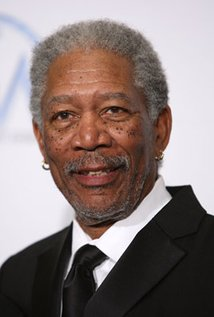

Morgan Freeman


In [15]:
# Display also image
from IPython.display import Image, display

display(Image(image_url))
print actors[1]['name']

Now let's combine all above steps into one block

In [16]:
# Let's write scraped data into a list
data = []
        

# Define the function which will scrape data about a person and return it 
def get_person_data(url):
    an_actor = BeautifulSoup(requests.get(url).text, 'html.parser')
    info = an_actor.find('table', attrs={'id': 'name-overview-widget-layout'})
    image = info.find('div', 'image').find('img')
    # We must write additional condition if some person's page is empty like this one http://www.imdb.com/name/nm0095029/
    if image is not None:
        image_url = image['src']
    else: 
        image_url = ''
    birth_data = info.find('div', attrs={'id': 'name-born-info'})
    if birth_data is not None:
        birthday = birth_data.find('time')['datetime']
        birth_place = birth_data.findAll('a')[-1].contents[0]
    else:
        birthday = birth_place = ''
    return image_url, birthday, birth_place


for movie in movies:
    # old fields
    title = movie.find('a').contents[0]
    genres = movie.find('span','genre').findAll('a')
    genres = [g.contents[0] for g in genres]
    runtime = movie.find('span','runtime').contents[0]
    rating = movie.find('span','value').contents[0]
    year = movie.find('span','year_type').contents[0]
    # Here we already add the outline data :)
    outline = movie.find('span', 'outline').contents[0]
    
    # new fields
    dirs, acts = str(movie.find('span','credit')).split("With:")
    dirs = BeautifulSoup(dirs + '</span>')
    acts = BeautifulSoup('<span>' + acts)

    directors = []
    for i in dirs.findAll('a'):
        image_url, birthday, birth_place = get_person_data('http://www.imdb.com' + i['href'])
        directors.append(
            {
                'name': i.contents[0], 
                'image_url': image_url,
                'born': birthday,
                'birth_place': birth_place         
            }
        )
    
    actors = []
    for i in acts.findAll('a'):
        image_url, birthday, birth_place = get_person_data('http://www.imdb.com' + i['href'])
        actors.append(
            {
                'name': i.contents[0], 
                'image_url': image_url,
                'born': birthday,
                'birth_place': birth_place         
            }
        )
    
    # Let's collect each movie data into a dictionary
    data.append({
        'title': title,
        'genres': genres,
        'runtime': runtime,
        'rating': rating,
        'released': year,
        'description': outline,
        'directors': directors,
        'actors': actors,
    })
    
print len(data)
# Display collected data for the first movie
data[0]

50


{'actors': [{'birth_place': u'West Covina, California, USA',
   'born': u'1958-10-16',
   'image_url': u'http://ia.media-imdb.com/images/M/MV5BMTI1OTYxNzAxOF5BMl5BanBnXkFtZTYwNTE5ODI4._V1_UY317_CR16,0,214,317_AL_.jpg',
   'name': u'Tim Robbins'},
  {'birth_place': u'Memphis, Tennessee, USA',
   'born': u'1937-6-1',
   'image_url': u'http://ia.media-imdb.com/images/M/MV5BMTc0MDMyMzI2OF5BMl5BanBnXkFtZTcwMzM2OTk1MQ@@._V1_UX214_CR0,0,214,317_AL_.jpg',
   'name': u'Morgan Freeman'},
  {'birth_place': u'Santa Monica, California, USA',
   'born': u'1945-11-15',
   'image_url': u'http://ia.media-imdb.com/images/M/MV5BMTc3MzY0MTQzM15BMl5BanBnXkFtZTcwMTM0ODYxNw@@._V1_UY317_CR91,0,214,317_AL_.jpg',
   'name': u'Bob Gunton'}],
 'description': u'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'directors': [{'birth_place': u'Montb\xe9liard, Doubs, France',
   'born': u'1959-1-28',
   'image_url': u'http://ia.media-imdb.com/ima

---
> ### Exercise:

> Many fields of collected data have a bad form, e.g. a released year is written in brackets, runtime contains "mins.".

> 1. Remove brackets in the `released` field.
> 2. Remain only numeric value in `runtime` field.
> 3. Divide the `birth_place` field into `country` and `city` fields.

> As we are collecting movies with released year starting from 1900, there are people who have already died, e.g. the famous american actor [Marlon Brando](http://www.imdb.com/name/nm0000008/). Thus, collect also data about the date of its death (`died`). 

---

In [ ]:
# type your code here

As you may see we have taken into account only one page with the first 50 movies. Let's collect data about the 1500 of the most popular movies, thus, we need to scrape 30 first pages of the chosen filter. We can define the page number by setting of the `start` attribute in the URL <br></br> http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1900,2015.<br></br> This URL corresponds to the web page with movies from the first one to 50th one. The URL <br></br> http://www.imdb.com/search/title?sort=num_votes,desc&start=51&title_type=feature&year=1900,2015<br></br> corresponds to movies from 51 to 100 in the list, the page <br></br> http://www.imdb.com/search/title?sort=num_votes,desc&start=101&title_type=feature&year=1900,2015<br></br> contains 101-150 movies, etc. Please, check it.

Thus, we can scrape data from each this web page using, for example, `for` loop:

In [19]:
# We will scrape data only from the main page without redirection into persons pages (for now)
def crawl_page(startswith):
    url = "http://www.imdb.com/search/title?sort=num_votes,desc&start={}&title_type=feature&year=1900,2015".format(startswith)
    r = requests.get(url)
    data = []
    bs = BeautifulSoup(r.text, 'html.parser')
    for movie in bs.findAll('td','title'):
        item = {}
        item['title'] = movie.find('a').contents[0]
        genres = movie.find('span','genre').findAll('a')
        item['genres'] = [g.contents[0] for g in genres]
        item['outline'] = movie.find('span', 'outline').contents[0]
        item['runtime'] = movie.find('span','runtime').contents[0]
        item['rating'] = movie.find('span','value').contents[0]
        item['released'] = movie.find('span','year_type').contents[0]
        data.append(item)
    return data

data = []
for i, j in enumerate(range(1, 1501, 50)):
    print 'Page', i+1
    data.extend(crawl_page(i))
    
print "\nData about {} movies were collected".format(len(data))

Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Page 11
Page 12
Page 13
Page 14
Page 15
Page 16
Page 17
Page 18
Page 19
Page 20
Page 21
Page 22
Page 23
Page 24
Page 25
Page 26
Page 27
Page 28
Page 29
Page 30

Data about 1500 movies were collected


---
> ### Exercise:

> Replace `crawl_page()` function `for` loop body with the code, which we have used earlier for scraping data from persons pages also and with your changes regarding the previous tasks. Collect full data about first 1500 movies and its directors/actors.

> Save result as an JSON file. Let's call it "imdb_movies_1500.json", because we will use it in the following lessons.

---

In [ ]:
# type your code here